In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
from google.colab import files
uploaded= files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
bank = pd.read_csv("bank-full.csv",delimiter=';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# **EDA**

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank[bank.duplicated()].shape

(0, 17)

In [7]:
bank.corr()

<ipython-input-7-b90cc3cd727b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


# Find out Discrete and Continuous Features

In [14]:
discrete = [ feature for feature in bank.columns if len(bank[feature].unique())<20 and feature]
print("Discrete Variables are :",len(discrete))

Discrete Variables are : 10


In [16]:
continuous = [ feature for feature in bank.columns if bank[feature].dtype!="O" and feature not in discrete]
print("Continuous Variables are :", len(continuous))

Continuous Variables are : 7


**Checking the Distrubtions**

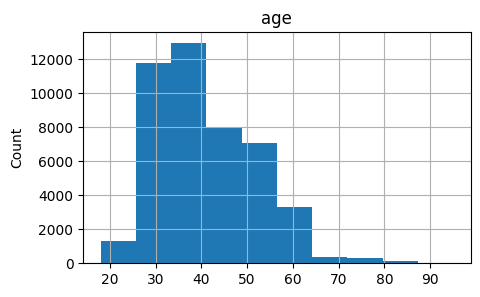

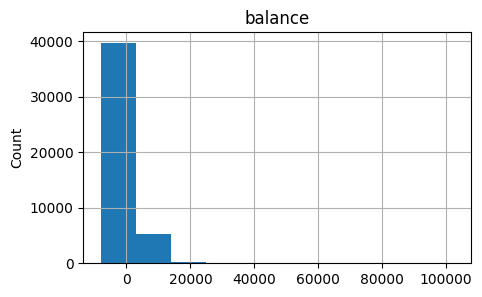

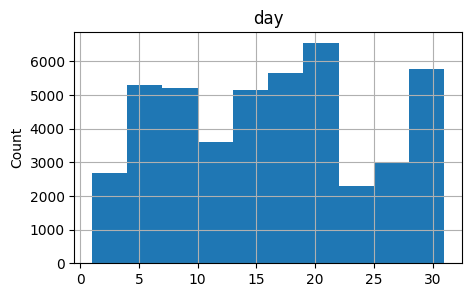

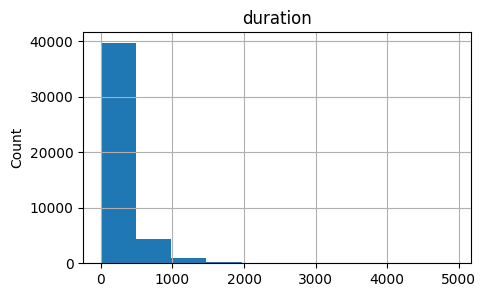

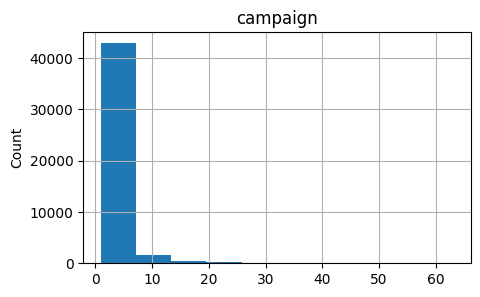

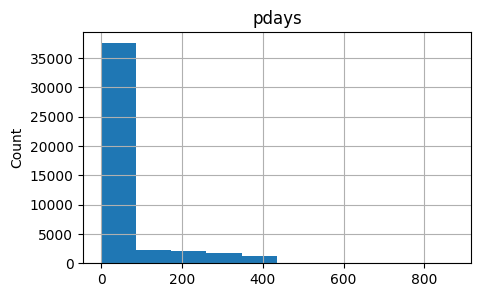

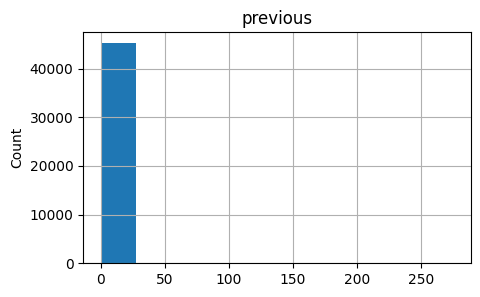

In [22]:
for feature in continuous:
  bank1= bank.copy()
  plt.figure(figsize=(5,3))
  bank[feature].hist()
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

**Outlier Detection**

<ipython-input-25-87115ccc080e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
<ipython-input-25-87115ccc080e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
<ipython-input-25-87115ccc080e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
<ipython-input-25-87115ccc080e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y

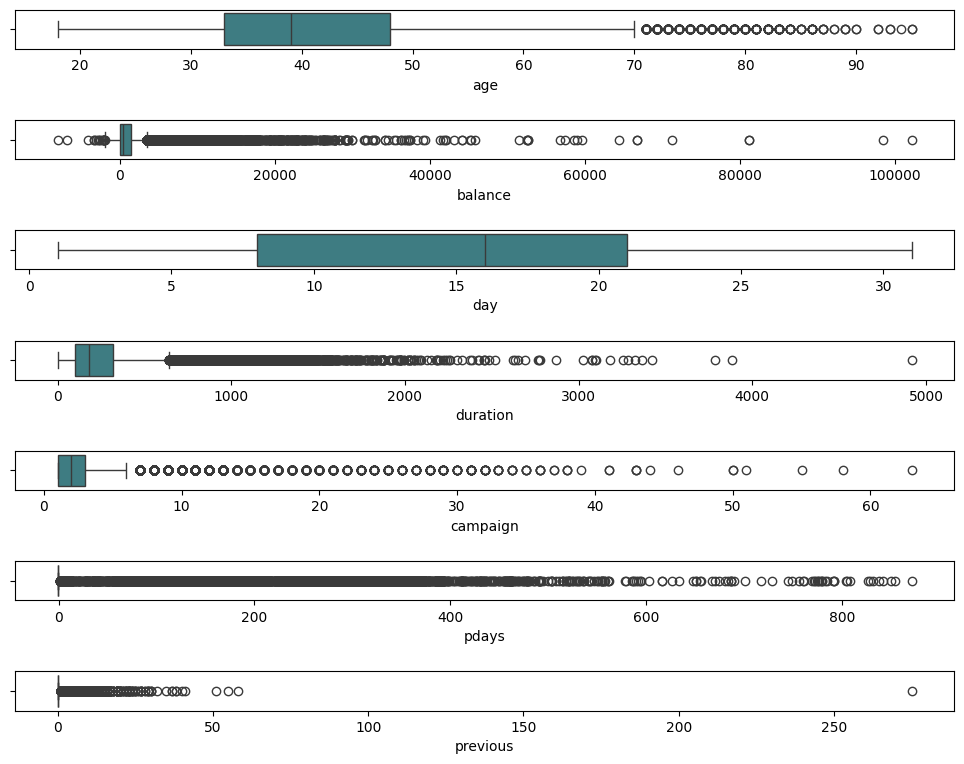

In [25]:
outlier = bank1.copy()
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

As the outliers are more we can't ignore them, as they may be important

In [70]:
bank[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_new=bank
bank_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [71]:
bank_new['job']= bank_new['job'].cat.codes
bank_new['marital']= bank_new['marital'].cat.codes
bank_new['education']= bank_new['education'].cat.codes
bank_new['default']= bank_new['default'].cat.codes
bank_new['housing']= bank_new['housing'].cat.codes
bank_new['loan']= bank_new['loan'].cat.codes
bank_new['contact']= bank_new['contact'].cat.codes
bank_new['month']= bank_new['month'].cat.codes
bank_new['poutcome']= bank_new['poutcome'].cat.codes
bank_new['y']= bank_new['y'].cat.codes

# **Model Bluding**

In [81]:
x1 = bank_new.drop('y',axis=1)
y1 = bank_new[['y']]

In [82]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [83]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [84]:
x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.20, random_state=12)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((36168, 16), (9043, 16), (36168, 1), (9043, 1))

In [85]:
logistic_model= LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
scaler= MinMaxScaler(feature_range=(0,1))
scaler.fit(bank_new)
scaled_x = scaler.transform(bank_new)

In [91]:
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [87]:
classifier=LogisticRegression()
classifier.fit(scaled_x,y1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# **Model Predictions**

In [88]:
train_pred= logistic_model.predict(x_train)

In [90]:
confusion_matrix(y_train,train_pred)

array([[31349,   580],
       [ 3506,   733]])

In [93]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [97]:
accuracy_score(y_train,train_pred)

0.8870272063702721

**AUC-RUC**

In [104]:
fpr,tpr,thresh= roc_curve(y_train,logistic_model.predict_proba(x_train)[:,1])

AUC score : 81.62%


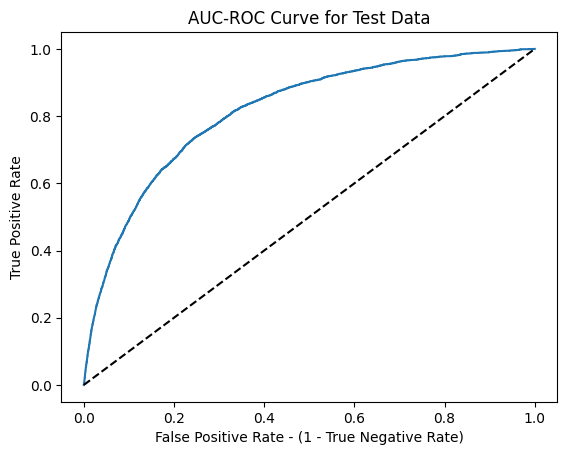

In [106]:
auc= roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))
plt.title('AUC-ROC Curve for Test Data')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate - (1 - True Negative Rate)')
plt.ylabel('True Positive Rate')
plt.show()

**Test Data**

In [107]:
test_pred=logistic_model.predict(x_test)

In [108]:
print(confusion_matrix(y_test,test_pred))

[[7850  143]
 [ 853  197]]


In [110]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [111]:
accuracy_score(y_test,test_pred)

0.8898595598805706

AUC score : 83.00%


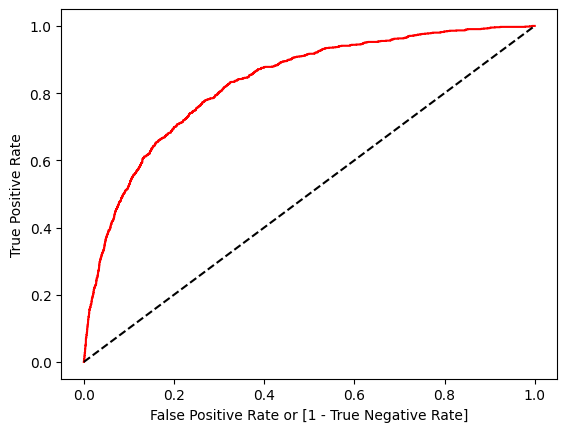

In [112]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# **Compare Accuracy**

In [113]:
print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 88.70%
Test set score     : 88.99%
